<a href="https://colab.research.google.com/github/alyilmaz99/movie-rec/blob/main/movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt

import os
import re
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [ ]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)
print('Model loading')

Model loading


In [ ]:
def embed(texts):
  return model(texts)

In [ ]:
embed(["this movie was great!"])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.00549279,  0.02886906, -0.02628897,  0.04502158, -0.01233335,
         0.02568329, -0.00071882, -0.05447304,  0.04221928, -0.0191371 ,
         0.02710011, -0.04328045, -0.02486858,  0.0135952 ,  0.00482793,
        -0.05379638,  0.01630707,  0.02139907,  0.02644024, -0.02320251,
         0.06569218, -0.10137626, -0.01691998,  0.02492482,  0.02406815,
        -0.03139618, -0.03265484, -0.05174927, -0.0727149 ,  0.10145196,
         0.03868447,  0.04380691, -0.02071748, -0.01873296, -0.03071439,
         0.01825575,  0.03627162,  0.01321464,  0.0094349 , -0.03006625,
         0.06655685,  0.01529936, -0.10101432, -0.00671943, -0.01578641,
         0.04991001,  0.02548564,  0.05454975, -0.01658573,  0.05624885,
         0.038345  , -0.08679942, -0.06096426, -0.01161775,  0.01997448,
         0.04206816, -0.04119828, -0.00768586, -0.05101158,  0.01210047,
        -0.01673209, -0.01382073,  0.00373702,  0.04911597, -0.03481682,
 

In [ ]:
df = pd.read_csv("Top_10000_Movies.csv", engine="python")
df.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.


In [ ]:
df = df[['original_title','overview']]
df.head()

,original_title,overview
0,Venom: Let There Be Carnage,After finding a host body in investigative rep...
1,Eternals,The Eternals are a team of ancient aliens who ...
2,Dune,"Paul Atreides, a brilliant and gifted young ma..."
3,Army of Thieves,A mysterious woman recruits bank teller Ludwig...
4,Free Guy,A bank teller called Guy realizes he is a back...


In [ ]:
df = df.dropna()
df = df.reset_index()
df = df[:5500]

In [ ]:
titles = df['overview']
titles[:5]

0    After finding a host body in investigative rep...
1    The Eternals are a team of ancient aliens who ...
2    Paul Atreides, a brilliant and gifted young ma...
3    A mysterious woman recruits bank teller Ludwig...
4    A bank teller called Guy realizes he is a back...
Name: overview, dtype: object

In [ ]:
embedding = embed(titles)
print("the embedding shape is:" , embedding.shape)

the embedding shape is: (5500, 512)


In [ ]:
pca = PCA(n_components=2)

emb_2d = pca.fit_transform(embedding)

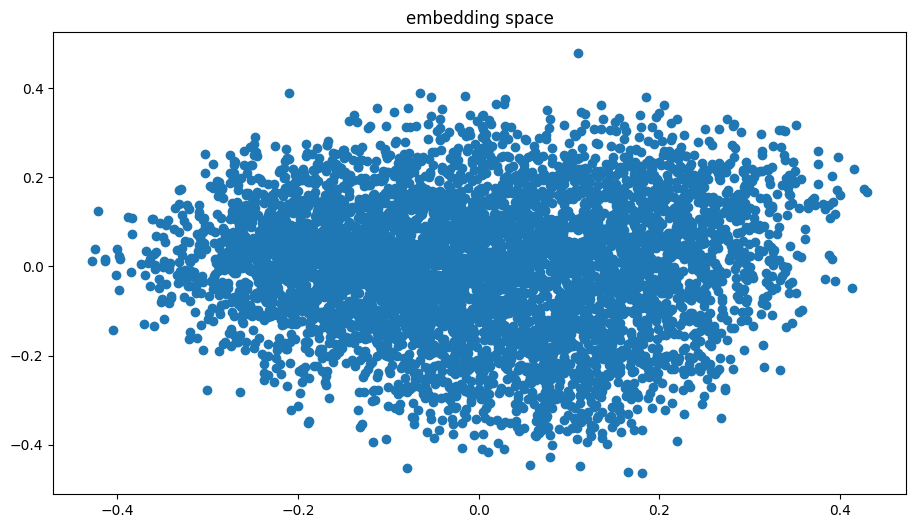

In [ ]:
plt.figure(figsize=(11,6))
plt.title('embedding space')
plt.scatter(emb_2d[:,0], emb_2d[:,1])
plt.show()


In [ ]:
nn = NearestNeighbors(n_neighbors=10)
nn.fit(embedding)

NearestNeighbors(n_neighbors=10)

In [ ]:
def recommend(text):
  emb = embed([text])
  neighbors = nn.kneighbors(emb, return_distance =False)[0]
  return df['original_title'].iloc[neighbors].tolist()

In [27]:
print('recommended movies: ')
recommend('horror')

recommended movies: 


['Always Watching: A Marble Hornets Story',
 'Scary Movie 2',
 'Playhouse',
 'They Live Inside Us',
 'A Nightmare on Elm Street',
 "Freddy's Dead: The Final Nightmare",
 'The Amityville Horror',
 'Tales from the Crypt',
 'Haunt',
 'Friday the 13th: A New Beginning']